In [1]:
import pandas as pd
import numpy as np

In [36]:
train_df = pd.read_csv('train.csv', quotechar='"', sep=',')
test_df = pd.read_csv('test.csv', sep=',', quotechar='"')
combine_df = [train_df,test_df]

# Data Profiling

In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train_df.shape

(891, 12)

In [47]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
columns = [ 'Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Cabin', 'Embarked']
for val in columns:
    arr = train_df[val].unique()
    print('{val}-{arr}'.format(val=val,arr=arr))

Survived-[0 1]
Pclass-[3 1 2]
Sex-['male' 'female']
SibSp-[1 0 3 4 2 5 8]
Parch-[0 1 2 5 3 4 6]
Cabin-[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102

0    549
1    342
Name: Survived, dtype: int64

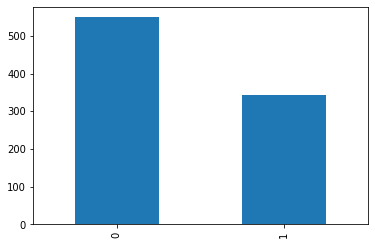

In [52]:
import matplotlib.pyplot as plt
train_df['Survived'].value_counts().plot(kind='bar')
train_df['Survived'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

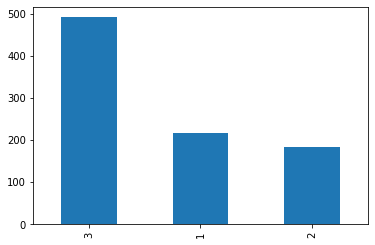

In [53]:
train_df['Pclass'].value_counts().plot(kind='bar')
train_df['Pclass'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

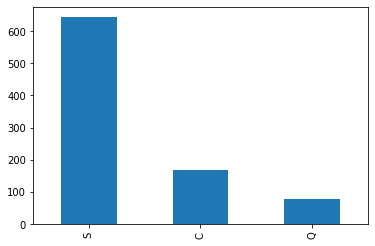

In [54]:
train_df['Embarked'].value_counts().plot(kind='bar')
train_df['Embarked'].value_counts()

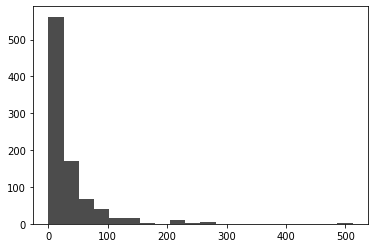

In [58]:
fig,axes = plt.subplots(1,1)
_ = axes.hist(train_df['Fare'], bins=20, color='k', alpha=0.7)

male      577
female    314
Name: Sex, dtype: int64

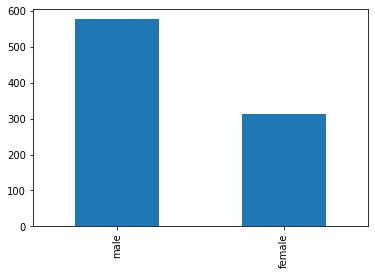

In [59]:
train_df['Sex'].value_counts().plot(kind='bar')
train_df['Sex'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

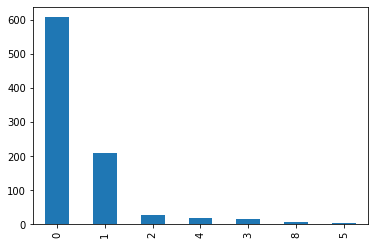

In [60]:
train_df['SibSp'].value_counts().plot(kind='bar')
train_df['SibSp'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

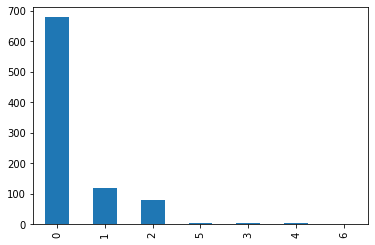

In [61]:
train_df['Parch'].value_counts().plot(kind='bar')
train_df['Parch'].value_counts()

D:\RND\Study\Data_Science\CondaInstall\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\RND\Study\Data_Science\CondaInstall\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


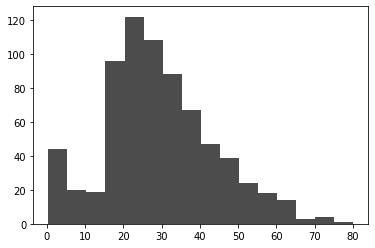

In [62]:
fig, axes = plt.subplots(1,1)
_ = axes.hist(train_df['Age'], bins=16, color='k', alpha=0.7)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt 

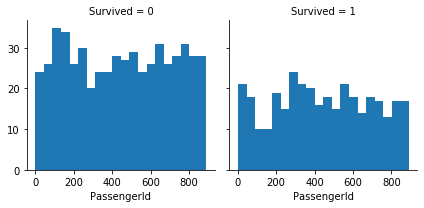

In [64]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'PassengerId', bins=20)

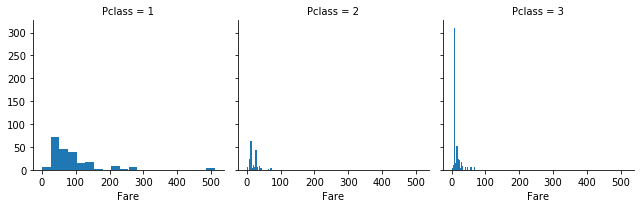

In [65]:
g1 = sns.FacetGrid(train_df, col='Pclass')
g1.map(plt.hist, 'Fare', bins=20)

In [66]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


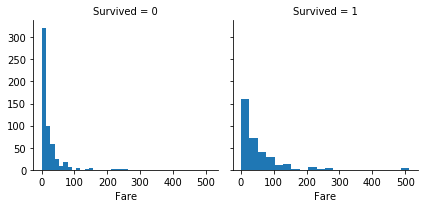

In [67]:
g2 = sns.FacetGrid(train_df, col='Survived')
g2.map(plt.hist, 'Fare', bins=20)

D:\RND\Study\Data_Science\CondaInstall\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\RND\Study\Data_Science\CondaInstall\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\RND\Study\Data_Science\CondaInstall\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


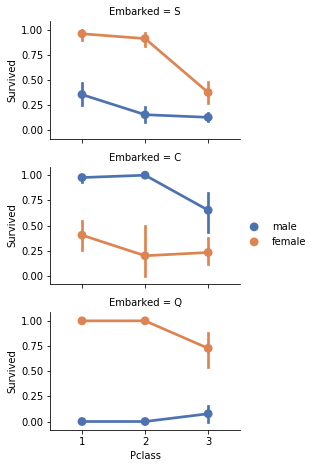

In [68]:
grid3 = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid3.add_legend()

D:\RND\Study\Data_Science\CondaInstall\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


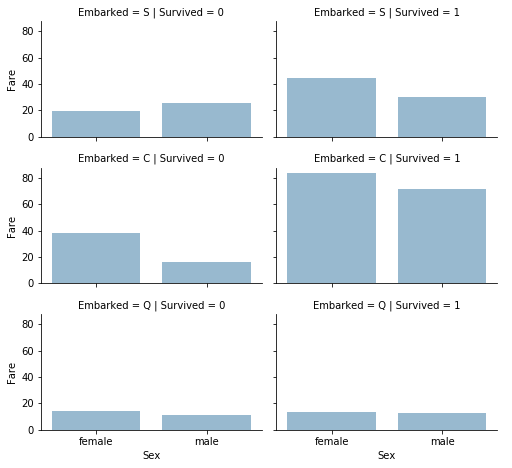

In [69]:
grid4 = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid4.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid4.add_legend()

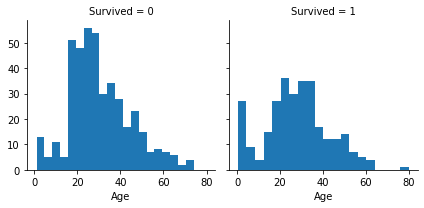

In [71]:
grid5 = sns.FacetGrid(train_df, col='Survived')
grid5.map(plt.hist, 'Age', bins=20)

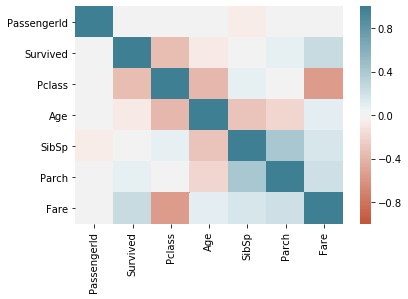

In [74]:
corr = train_df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200)
)

# Data Preparation

In [77]:
for df in combine_df:
    df.dropna(how='all', inplace=True)
    print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [79]:
freqEmb = train_df['Embarked'].dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(freqPort)
fareMean = test_df['Fare'].dropna().mean()
test_df['Fare'] = test_df['Fare'].fillna(fareMean)

In [85]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [86]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [88]:
for df in combine_df:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin' ], axis=1, inplace=True)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    df['Sex'] = df['Sex'].map({'female':0, 'male':1})
    df['Embarked'] = df['Embarked'].map({'S':1,'C':2,'Q':3})

In [89]:
train_df.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,7.25,1,1,2


In [90]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [91]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(train_df)
arr = imp.transform(train_df)
train_df = pd.DataFrame(arr, columns=['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilySize'])
train_df['Survived'] = train_df['Survived'].round(0).astype(int)
train_df['Pclass'] = train_df['Pclass'].round(0).astype(int)
train_df['Sex'] = train_df['Sex'].round(0).astype(int)
train_df['Embarked'] = train_df['Embarked'].round(0).astype(int)
train_df['Title'] = train_df['Title'].round(0).astype(int)
train_df['FamilySize'] = train_df['FamilySize'].round(0).astype(int)
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,7.2500,1,1,2
1,1,1,0,38.0,71.2833,2,3,2
2,1,3,0,26.0,7.9250,1,2,1
3,1,1,0,35.0,53.1000,1,3,2
4,0,3,1,35.0,8.0500,1,1,1


In [92]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(test_df)
arr = imp.transform(test_df)
test_df = pd.DataFrame(arr, columns=['Pclass','Sex','Age','Fare','Embarked','Title','FamilySize'])
test_df['Pclass'] = test_df['Pclass'].round(0).astype(int)
test_df['Sex'] = test_df['Sex'].round(0).astype(int)
test_df['Embarked'] = test_df['Embarked'].round(0).astype(int)
test_df['Title'] = test_df['Title'].round(0).astype(int)
test_df['FamilySize'] = test_df['FamilySize'].round(0).astype(int)
test_df.head(5)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,1,34.5,7.8292,3,1,1
1,3,0,47.0,7.0000,1,3,2
2,2,1,62.0,9.6875,3,1,1
3,3,1,27.0,8.6625,1,1,1
4,3,0,22.0,12.2875,1,3,3


# Model Building

In [96]:
from xgboost import XGBClassifier
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [94]:
train_df['Fare'] = np.log(train_df['Fare'] + 1)
train_dfQ1 = train_df['Fare'].quantile(0.25)
train_dfQ3 = train_df['Fare'].quantile(0.75)
train_dfIQR = train_dfQ3 - train_dfQ1
print(train_dfIQR)
train_df = train_df[~((train_df['Fare'] < (train_dfQ1 - 1.5*train_dfIQR)) | (train_df['Fare'] > (train_dfQ3 + 1.5*train_dfIQR)))]

1.2785181113463184


In [97]:
y = train_df['Survived']
X = train_df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [98]:
xgb = XGBClassifier(random_state=0)
print(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [99]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8744186046511628
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       124
           1       0.88      0.81      0.85        91

    accuracy                           0.87       215
   macro avg       0.88      0.87      0.87       215
weighted avg       0.87      0.87      0.87       215

[[114  10]
 [ 17  74]]


# Kaggle Submission

In [100]:
y_final_pred = xgb.predict(test_df)

In [101]:
test_df2 = pd.read_csv('test.csv', sep=',', quotechar='"')
test_df2.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
submission = pd.DataFrame({
        "PassengerId": test_df2["PassengerId"],
        "Survived": y_final_pred
    })

In [103]:
submission.to_csv('submission.csv', index=False)